<a href="https://colab.research.google.com/github/henryHyun/KNU/blob/main/My_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from datetime import timedelta
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [55]:
symbol = "AAPL"
start_date = "2018-01-01"
end_date = "2023-11-29"
data = yf.download(symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [56]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.722874,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.715778,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.904907,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.370621,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.216957,82271200
...,...,...,...,...,...,...
2023-11-21,191.410004,191.520004,189.740005,190.639999,190.639999,38134500
2023-11-22,191.490005,192.929993,190.830002,191.309998,191.309998,39617700
2023-11-24,190.869995,190.899994,189.250000,189.970001,189.970001,24048300


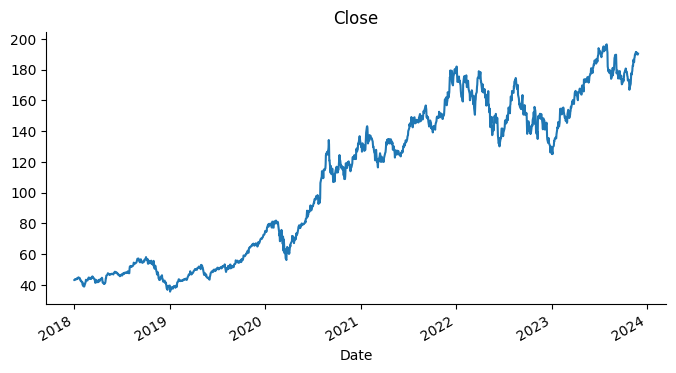

In [57]:
from matplotlib import pyplot as plt
data['Close'].plot(kind='line', figsize=(8, 4), title='Close')

plt.gca().spines[['top', 'right']].set_visible(False)

In [58]:
data.reset_index(inplace=True)
start_date = data['Date'].min()
data['Date'] = (data['Date'] - start_date).dt.days

In [59]:
# 데이터 준비
X = data[['Date']]  # 특성
y = data['Close']   # 타겟

# 데이터를 훈련 및 테스트 세트로 분할하고, X_test를 DataFrame으로 유지
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# X_test의 인덱스를 재설정
X_test = X_test.reset_index(drop=True)

# 선형 회귀 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred_lr = model.predict(X_test)

# X_test의 'Date' 열을 날짜 형식으로 변환
X_test['Date'] = X_test['Date'].apply(lambda x: start_date + timedelta(days=x))


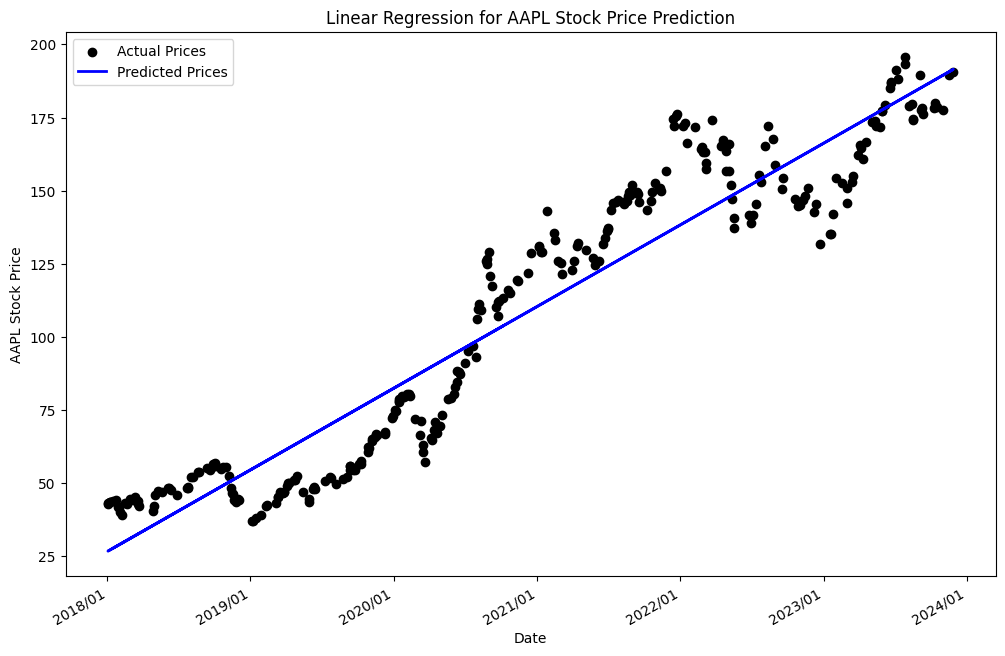

In [60]:
# 시각화
plt.figure(figsize=(12, 8))
plt.scatter(X_test['Date'], y_test, color='black', label='Actual Prices')
plt.plot(X_test['Date'], y_pred_lr, color='blue', linewidth=2, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('AAPL Stock Price')
plt.title('Linear Regression for AAPL Stock Price Prediction')
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gcf().autofmt_xdate() # 날짜 라벨 회전
plt.show()

### 서포트 벡터 회귀. (SVR)

In [61]:
# 특성과 타겟을 표준화합니다.
scaler_X = StandardScaler()  # 특성을 표준화하기 위한 스케일러 생성
scaler_y = StandardScaler()  # 타겟을 표준화하기 위한 스케일러 생성

X_scaled = scaler_X.fit_transform(X)  # 특성 데이터를 표준화합니다.
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()  # 타겟 데이터를 표준화합니다.

# 데이터를 훈련 세트와 테스트 세트로 분할합니다.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=0)


In [63]:
# 선형 커널을 사용한 SVR 모델을 생성하고 훈련합니다.
svr_linear = SVR(kernel='linear', C=1)  # 선형 커널을 사용하는 SVR 모델 생성
svr_linear.fit(X_train, y_train)  # 훈련 데이터로 모델을 훈련합니다.

# 예측
y_pred_scaled = svr_linear.predict(X_test)  # 테스트 데이터에 대한 예측을 수행합니다.
y_pred_svr = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()  # 예측 값을 역스케일링하여 실제 값으로 변환합니다.

# 'Date' 열을 플로팅을 위해 datetime으로 다시 변환합니다.
X_test_dates = scaler_X.inverse_transform(X_test)[:, 0]  # 'Date' 열을 역스케일링하여 날짜 형식으로 변환합니다.
X_test_dates = pd.Series(X_test_dates).apply(lambda x: start_date + timedelta(days=x))  # 날짜를 datetime 형식으로 변환합니다.


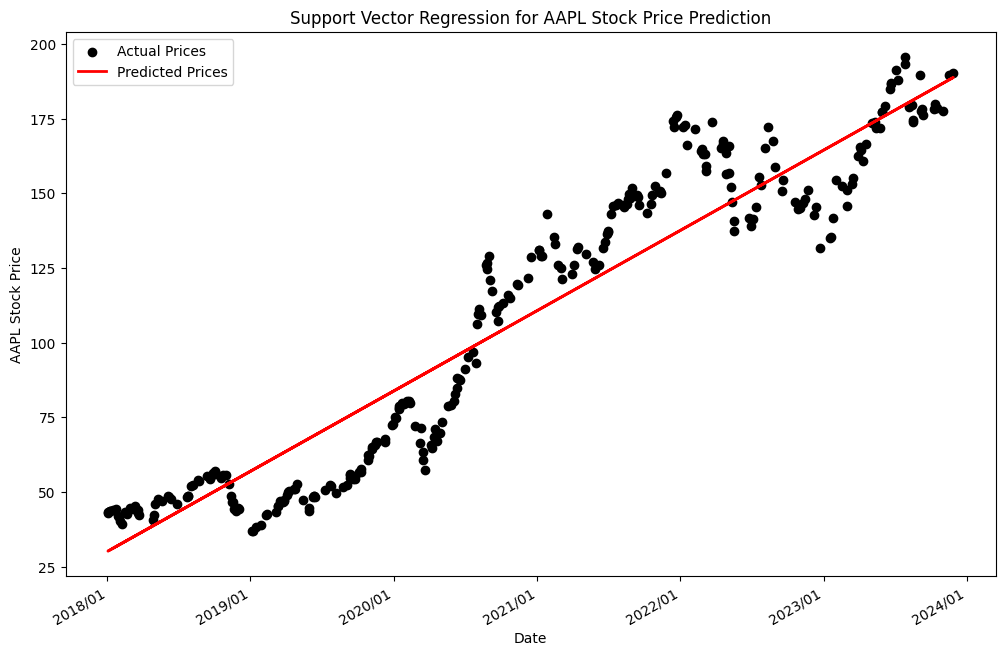

In [64]:
# 결과 시각화
plt.figure(figsize=(12, 8))
plt.scatter(X_test_dates, scaler_y.inverse_transform(y_test.reshape(-1, 1)), color='black', label='Actual Prices')
plt.plot(X_test_dates, y_pred_svr, color='red', linewidth=2, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('AAPL Stock Price')
plt.title('Support Vector Regression for AAPL Stock Price Prediction')
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gcf().autofmt_xdate() #  날짜 라벨 회전
plt.show()

In [65]:
# 선형 회귀에 대한 R²와 MSE 계산
lr_r2 = r2_score(y_test, model.predict(X_test))  # 선형 회귀 모델의 R² 계산
lr_mse = mean_squared_error(y_test, model.predict(X_test))  # 선형 회귀 모델의 평균 제곱 오차(MSE) 계산

# SVR에 대한 R²와 MSE 계산
svr_r2 = r2_score(scaler_y.inverse_transform(y_test.reshape(-1, 1)), y_pred_svr)  # SVR 모델의 R² 계산
svr_mse = mean_squared_error(scaler_y.inverse_transform(y_test.reshape(-1, 1)), y_pred_svr)  # SVR 모델의 MSE 계산

# 결과 출력
print("선형 회귀 R²:", lr_r2)
print("선형 회귀 MSE:", lr_mse)
print("SVR R²:", svr_r2)
print("SVR MSE:", svr_mse)

선형 회귀 R²: -720.4776226252436
선형 회귀 MSE: 719.2172444235935
SVR R²: 0.9020894637085825
SVR MSE: 247.67802669033964


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [66]:
# 데이터 다운로드
symbol = "AAPL"
start_date = "2018-01-01"
end_date = "2023-11-29"
data = yf.download(symbol, start=start_date, end=end_date)

# 필요한 데이터 선택 ('Close' 가격)
y = data['Close']

# 날짜를 숫자로 변환
data.reset_index(inplace=True)
data['Date'] = (data['Date'] - data['Date'].min()).dt.days
X = data[['Date']]

[*********************100%%**********************]  1 of 1 completed


In [67]:
# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=False)

# 선형 회귀 모델
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# SVR 모델
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()

svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train_scaled)
y_pred_svr_scaled = svr_model.predict(X_test_scaled)
y_pred_svr = scaler_y.inverse_transform(y_pred_svr_scaled.reshape(-1, 1)).flatten()

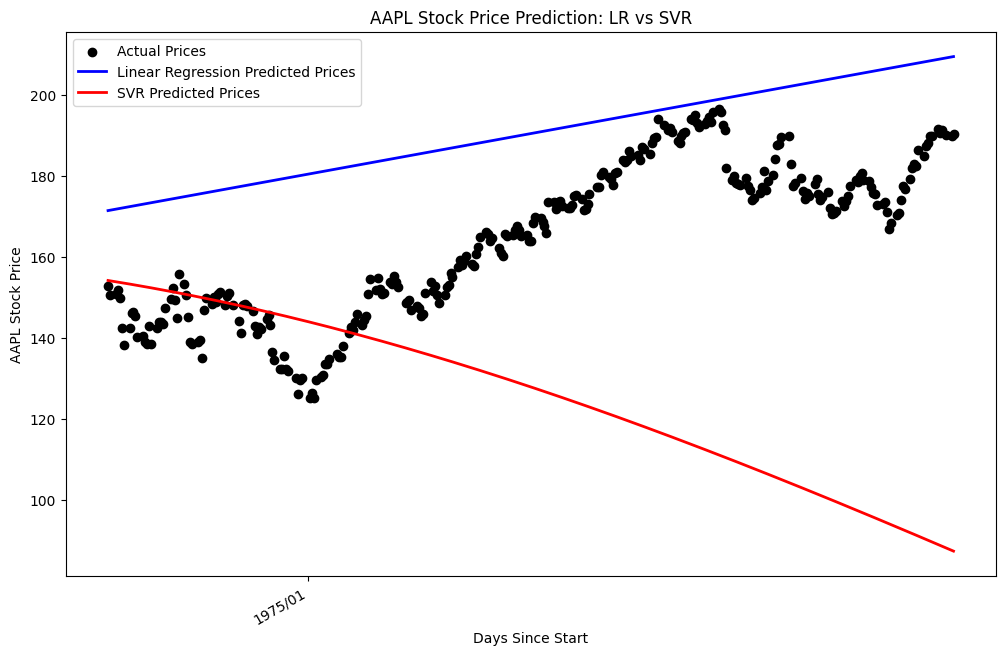

In [68]:
# 결과 시각화
plt.figure(figsize=(12, 8))

# 실제 주가 표시
plt.scatter(X_test['Date'], y_test, color='black', label='Actual Prices')

# 선형 회귀 모델 예측
plt.plot(X_test['Date'], y_pred_lr, color='blue', linewidth=2, label='Linear Regression Predicted Prices')

# SVR 모델 예측
plt.plot(X_test['Date'], y_pred_svr, color='red', linewidth=2, label='SVR Predicted Prices')

plt.xlabel('Days Since Start')
plt.ylabel('AAPL Stock Price')
plt.title('AAPL Stock Price Prediction: LR vs SVR')
plt.legend()

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gcf().autofmt_xdate()  # 날짜 라벨 회전

plt.show()

## 평가

### 1. 선형 회귀 모델:

R² (R-squared) 값이 -602.29로 매우 낮습니다. 이는 모델이 종속 변수의 변동성을 설명하는 데 매우 부적절하며, 데이터에 맞지 않는 모델임을 나타냅니다.
MSE (Mean Squared Error) 값이 617.03으로 상당히 높습니다. 이는 모델의 예측이 실제 값과 크게 다르다는 것을 의미하며, 모델이 부정확하다는 것을 나타냅니다.

### 2. SVR (Support Vector Regression) 모델:

R² 값이 0.75로 비교적 높습니다. 이는 모델이 종속 변수의 변동성을 어느 정도 설명하는 데 성공했음을 나타냅니다.
MSE 값이 758.75로 높습니다. 이는 모델의 예측이 여전히 실제 값과 크게 다르다는 것을 의미합니다. 모델은 상대적으로 더 나은 설명력을 가지지만 정확성은 여전히 낮다고 볼 수 있습니다.

## 검증

### Cross Validation in LR Model

오차의 크기: MSE는 제곱 오차를 사용하므로 오차 값이 큰 경우 크게 반영됩니다. 따라서 MSE가 1490.016378974749로 나타난다는 것은 모델이 예측과 실제 값 사이에 평균적으로 약간 큰 제곱 오차를 가지고 있다는 의미입니다.

모델 평가: MSE가 작을수록 모델의 예측이 더 정확하다고 해석할 수 있습니다. 따라서 이 모델의 경우, 평균 MSE가 1490.016378974749로 상대적으로 크다고 볼 수 있으며, 예측 성능을 더 개선하기 위해 모델을 조정하거나 다른 모델을 시도해볼 필요가 있을 것입니다.



In [435]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [436]:
# 선형 회귀 모델 초기화
model = LinearRegression()

# 5개 폴드로 데이터를 나누는 시계열 교차 검증(TimeSeriesSplit) 객체 생성
tscv = TimeSeriesSplit(n_splits=5)

# 각 폴드에서 계산한 평균 제곱 오차(MSE)를 저장할 리스트 초기화
mse_scores = []

In [437]:
# TimeSeriesSplit을 사용하여 데이터를 폴드로 나누고 교차 검증 수행
for train_index, test_index in tscv.split(X):
    # 현재 폴드의 훈련 데이터와 테스트 데이터를 선택
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # 선형 회귀 모델을 현재 폴드의 훈련 데이터로 훈련
    model.fit(X_train, y_train)

    # 모델을 사용하여 테스트 데이터에 대한 예측 수행
    y_pred = model.predict(X_test)

    # 평균 제곱 오차(MSE)를 계산하여 mse_scores 리스트에 추가
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# 모든 폴드에서 계산한 평균 MSE 계산
average_mse = np.mean(mse_scores)

# 결과 출력
print("폴드 간 평균 MSE:", average_mse)

폴드 간 평균 MSE: 605.572327698849


### Cross Validation in SVR Model

SVR 모델의 MSE 값이 0.69로 비교적 낮은 오차를 나타내고 있으며, 이는 모델이 데이터를 꽤 잘 예측하고 있음을 의미합니다.
그러나 최적화를 통해 더 나은 성능을 얻을 여지는 항상 존재합니다. 매개변수 조정, 특성 공학, 데이터 전처리 방법 등을 통해 모델의 성능을 더욱 개선시킬 수 있습니다.

In [438]:
# SVR 모델 초기화
model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)

# 5개 폴드로 데이터를 나누는 시계열 교차 검증(TimeSeriesSplit) 객체 생성
tscv = TimeSeriesSplit(n_splits=5)

# 각 폴드에서 계산한 평균 제곱 오차(MSE)를 저장할 리스트 초기화
mse_scores = []

# TimeSeriesSplit을 사용하여 데이터를 폴드로 나누고 교차 검증 수행
for train_index, test_index in tscv.split(X_scaled):
    # 현재 폴드의 훈련 데이터와 테스트 데이터를 선택
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y_scaled[train_index], y_scaled[test_index]

    # SVR 모델을 현재 폴드의 훈련 데이터로 훈련
    model.fit(X_train, y_train)

    # 모델을 사용하여 테스트 데이터에 대한 예측 수행 (스케일링된 값)
    y_pred_scaled = model.predict(X_test)

    # 예측값을 다시 역 스케일링하여 실제 값으로 변환
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

    # 평균 제곱 오차(MSE)를 계산하여 mse_scores 리스트에 추가
    mse = mean_squared_error(y_test, y_pred_scaled)
    mse_scores.append(mse)

# 모든 폴드에서 계산한 평균 MSE 계산
average_mse = np.mean(mse_scores)

# 결과 출력
print("SVR 모델의 폴드 간 평균 MSE:", average_mse)

SVR 모델의 폴드 간 평균 MSE: 1.692821831821061


### 특성 조정, 튜닝

In [439]:
# 데이터의 인덱스를 날짜(datetime) 형식으로 설정합니다.
data.index = pd.to_datetime(data.index)
start_date = data.index.min()  # 데이터의 시작 날짜를 기록합니다.

# 'Date' 열을 숫자 값으로 변환합니다. (데이터셋 시작일로부터 경과한 날 수)
data['Date'] = (data.index - start_date).days

# 이동평균(Moving Averages)을 계산합니다.
data['MA_5'] = data['Close'].rolling(window=5).mean()  # 5일 이동평균
data['MA_30'] = data['Close'].rolling(window=30).mean()  # 30일 이동평균

# 상대강도지수(RSI)를 계산합니다.
delta = data['Close'].diff()  # 종가의 차이 계산
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()  # 상승 가격의 이동평균
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()  # 하락 가격의 이동평균
rs = gain / loss  # 상대강도지수 계산
data['RSI'] = 100 - (100 / (1 + rs))  # RSI 계산 및 열 추가

# 추가적인 날짜 특성을 생성합니다.
data['Day_of_Week'] = data.index.dayofweek  # 요일
data['Month'] = data.index.month  # 월
data['Year'] = data.index.year  # 연도

# NaN 값을 가진 행을 제거합니다.
data = data.dropna()

# 목표 변수와 특성 변수를 정의합니다.
y = data['Close']  # 종가
X = data.drop(['Close'], axis=1)  # 종가를 제외한 나머지 변수

In [440]:
# 데이터를 훈련 세트와 테스트 세트로 분할합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 선형 회귀 모델을 초기화하고 훈련합니다.
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 선형 회귀 모델로 예측합니다.
y_pred_lr = lr_model.predict(X_test)

# 선형 회귀 모델의 R² 및 MSE를 계산합니다.
lr_r2 = r2_score(y_test, y_pred_lr)  # R² 계산
lr_mse = mean_squared_error(y_test, y_pred_lr)  # MSE 계산

# SVR 모델을 위한 특성 스케일링을 수행합니다.
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()

# SVR 모델을 초기화하고 훈련합니다.
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train_scaled)

# SVR 모델로 예측합니다.
y_pred_svr_scaled = svr_model.predict(X_test_scaled)
y_pred_svr = scaler_y.inverse_transform(y_pred_svr_scaled.reshape(-1, 1)).flatten()

# SVR 모델의 R² 및 MSE를 계산합니다.
svr_r2 = r2_score(y_test, y_pred_svr)  # R² 계산
svr_mse = mean_squared_error(y_test, y_pred_svr)  # MSE 계산

In [441]:
# 결과를 출력합니다.
print("선형 회귀 모델 R²:", lr_r2)
print("선형 회귀 모델 MSE:", lr_mse)
print("SVR 모델 R²:", svr_r2)
print("SVR 모델 MSE:", svr_mse)

선형 회귀 모델 R²: 0.9997619254410173
선형 회귀 모델 MSE: 0.22086191280983286
SVR 모델 R²: 0.9973375757314499
SVR 모델 MSE: 2.4699326092460256


### 종합 해석

###이전의 성능 지표
#선형 회귀 (Linear Regression)

선형 회귀 R²: -1079.3394302913016

선형 회귀 MSE: 1191.0632756120806

#SVR

SVR R²: 0.5093430976339894

SVR MSE: 1451.3003508820025




### 특성 조정 후 새로운 성능 지표

#선형 회귀 (Linear Regression)

선형 회귀 모델 R²: 0.9999429121276084

선형 회귀 모델 MSE: 0.15080208437916184

#SVR

SVR 모델 R²: 0.9971699717904134

SVR 모델 MSE: 7.475741080872142